# 2. Exploration

In [1]:
try(library(tidyverse), silent=TRUE)
library(lubridate)
library(glue)
library(cowplot)
library(survminer)
library(survival)
library(ggsci)
library(arsenal)
library(yaml)

#setwd("/")
#path = "/home/steinfej/projects/uk_biobank/"
#dataset_path = "data/datasets/cvd_massive_excl_emb_ind"

Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

project_label = "22_retina_phewas"
project_path = glue("{base_path}/results/projects/{project_label}")
figure_path = glue("{project_path}/figures")
output_path = glue("{project_path}/data")

experiment = '220812_test'
experiment_path = glue("{output_path}/{experiment}")

[1] "/sc-projects/sc-proj-ukb-cvd"


In [3]:
output_path

/sc-projects/sc-proj-ukb-cvd/results/projects/22_retina_phewas/data

## Load data

In [4]:
endpoint_defs = arrow::read_feather(glue("{output_path}/phecode_defs_220306.feather")) %>% arrange(endpoint)

In [5]:
data_outcomes = arrow::read_feather(glue("{output_path}/baseline_outcomes_long_220627.feather", as_data_frame=FALSE))

In [6]:
data_outcomes %>% head()

eid,endpoint,prev,event,time
<int>,<fct>,<lgl>,<lgl>,<dbl>
1000018,OMOP_4306655,FALSE,FALSE,11.86609
1000020,OMOP_4306655,FALSE,FALSE,13.59645
1000037,OMOP_4306655,FALSE,FALSE,12.86816
1000043,OMOP_4306655,FALSE,FALSE,12.30963
1000051,OMOP_4306655,FALSE,FALSE,15.29121
1000066,OMOP_4306655,FALSE,FALSE,11.77574


In [7]:
data_outcomes = data_outcomes %>% 
        mutate(prev = as.integer(prev)) %>% 
        mutate(event = as.integer(event))

In [8]:
data_outcomes_agg = data_outcomes %>% filter(prev==0) %>% group_by(endpoint) %>% summarise(ratio = mean(event))

In [9]:
dataset_path = "/sc-projects/sc-proj-ukb-cvd/data/3_datasets_post/210714_metabolomics"

In [10]:
data = arrow::read_feather(glue("{dataset_path}/data_merged.feather")) %>% filter(eid %in% unique(data_outcomes$eid))
data_description = arrow::read_feather(glue("{dataset_path}/description.feather"))

In [11]:
eids_with_retina = read_csv("/sc-projects/sc-proj-ukb-cvd/data/retina/eids.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  retina_eids = col_double()
)



In [12]:
data = data %>% 
    mutate(erectile_dysfunction = case_when(sex=="Female" ~ FALSE, TRUE ~ erectile_dysfunction))
data

eid,age_at_recruitment,sex,ethnic_background,townsend_deprivation_index_at_recruitment,date_of_attending_assessment_centre,uk_biobank_assessment_centre,birth_date,overall_health_rating,smoking_status,⋯,death_cvd_comp_event,death_cvd_comp_event_time,SCORE_comp_event,SCORE_comp_event_time,ASCVD_comp_event,ASCVD_comp_event_time,QRISK3_comp_event,QRISK3_comp_event_time,MACE_comp_event,MACE_comp_event_time
<int>,<dbl>,<fct>,<fct>,<dbl>,<date>,<chr>,<date>,<ord>,<ord>,⋯,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1000018,49,Female,White,-1.8529300,2009-11-12,Sheffield,1960-11-12,Fair,Current,⋯,0,11.359343,0,11.359343,0,11.359343,0,11.359343,0,11.359343
1000020,59,Male,White,0.2042480,2008-02-19,Sheffield,1949-02-19,Good,Current,⋯,0,13.089665,0,13.089665,0,13.089665,0,13.089665,0,13.089665
1000037,59,Female,White,-3.4988600,2008-11-11,Sheffield,1949-11-11,Good,Previous,⋯,0,12.361396,0,12.361396,1,7.969884,1,7.969884,0,12.361396
1000043,63,Male,White,-5.3511500,2009-06-03,Sheffield,1946-06-03,Fair,Previous,⋯,0,11.802875,0,11.802875,1,5.122519,1,5.122519,1,5.122519
1000051,51,Female,White,-1.7990800,2006-06-10,Sheffield,1955-06-10,Poor,Never,⋯,0,14.784394,0,14.784394,0,14.784394,0,14.784394,0,14.784394
1000066,67,Male,White,-5.0620000,2009-12-15,Sheffield,1942-12-15,Good,Never,⋯,0,11.268994,0,11.268994,0,11.268994,0,11.268994,0,11.268994
1000079,60,Female,White,-2.7080400,2008-03-18,Sheffield,1948-03-18,Fair,Never,⋯,0,13.013005,0,13.013005,1,1.054073,1,1.054073,0,13.013005
1000084,43,Male,White,7.5661000,2007-10-18,Sheffield,1964-10-18,Fair,Never,⋯,0,13.429158,0,13.429158,0,13.429158,0,13.429158,0,13.429158
1000092,50,Female,Black,7.6641800,2009-06-16,Sheffield,1959-06-16,Poor,Current,⋯,0,11.767283,0,11.767283,0,11.767283,0,11.767283,0,11.767283


In [13]:
data = data %>% mutate_at(c("sex", "overall_health_rating", "smoking_status", "ethnic_background"), as.factor)
data = data %>% mutate(sex=fct_relevel(sex, c("Male", "Female")),
                       overall_health_rating=fct_relevel(overall_health_rating, c("Excellent", "Good", "Fair", "Poor")),
                       smoking_status=fct_relevel(smoking_status, c("Current", "Previous", "Never")))

In [14]:
data = data %>% filter(eid %in% eids_with_retina$retina_eids)

In [15]:
f = list()
f$basics = c('age_at_recruitment','sex', 'ethnic_background',"townsend_deprivation_index_at_recruitment")
f$questionnaire = c('overall_health_rating','smoking_status')
f$measurements = c('body_mass_index_bmi','weight',"standing_height",'systolic_blood_pressure','diastolic_blood_pressure')
f$labs = c("cholesterol", "hdl_cholesterol", "ldl_direct","triglycerides")
f$family_history = c('fh_heart_disease')
f$diagnoses = c("diabetes1", "diabetes2", "chronic_kidney_disease", "atrial_fibrillation", "migraine", 
                      "rheumatoid_arthritis", "systemic_lupus_erythematosus", "severe_mental_illness", "erectile_dysfunction")
f$medications = c("antihypertensives", "ass", "atypical_antipsychotics", "glucocorticoids")

In [61]:
PANEL = c( # 38 clinical predictors
    # basics
    "age_at_recruitment", 
    "sex", 
    "ethnic_background",# # added
   # "education_years",
    'smoking_status', # current smoker
    #'alcohol_intake_frequency', # 'Daily or almost daily'
  #  "daily_physical_activity",

    #"daily_healthy_food",
    
    # family history
   # "fh_diabetes",
    
    # diagnoses
   "diabetes2",
        
    # physical
    "weight", 
    "standing_height", 
    "body_mass_index_bmi",
   # 'waist_hip_ratio',
    #"waist_circumference",
    "systolic_blood_pressure",
    
    # lipids
   "cholesterol", 
    #"ldl_direct", 
    "hdl_cholesterol"
    #"triglycerides",
    
    # diabetes
#    'glucose'
   # 'glycated_haemoglobin_hba1c',
    
    # kidney
  #  'creatinine',
  #  'cystatin_c',
  #  'urea',
  #  'urate',
        
    # liver
  #  'aspartate_aminotransferase',
  #  'alanine_aminotransferase',
   # 'alkaline_phosphatase',
   # 'albumin',
    
    # inflammation
   # 'creactive_protein',
    
    # Blood counts
   # 'red_blood_cell_erythrocyte_count',
   # 'white_blood_cell_leukocyte_count',
   # 'platelet_count',
   # 'haemoglobin_concentration',
   # 'haematocrit_percentage',
   #     'mean_corpuscular_volume',
   # 'mean_corpuscular_haemoglobin',
  #  'mean_corpuscular_haemoglobin_concentration',
    
    # medications
  #  'antihypertensives'
        )

In [62]:
table_data = data %>% select(all_of(PANEL))

In [63]:
table_data

age_at_recruitment,sex,ethnic_background,smoking_status,diabetes2,weight,standing_height,body_mass_index_bmi,systolic_blood_pressure,cholesterol,hdl_cholesterol
<dbl>,<fct>,<fct>,<ord>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
50,Female,White,Previous,FALSE,65.6,170.0,22.6990,105.5,6.228,1.800
43,Male,White,Previous,FALSE,90.1,179.0,28.1202,123.5,5.742,1.287
64,Female,White,Never,FALSE,60.2,160.0,23.5156,105.5,5.710,NA
68,Female,White,Never,FALSE,61.3,150.0,27.2444,124.0,6.377,1.783
42,Male,White,Never,FALSE,80.9,181.0,24.6940,114.5,4.830,1.272
52,Female,White,Never,FALSE,61.6,150.0,27.3778,121.5,5.785,1.429
42,Female,White,Never,FALSE,62.7,163.0,23.5989,121.5,NA,NA
53,Female,White,Previous,FALSE,72.5,165.0,26.6299,121.0,6.444,2.094
51,Male,White,NA,FALSE,103.2,176.5,33.1276,127.0,6.054,1.453


In [64]:
library(gtsummary)
table1 = table_data %>% 
    mutate(smoking_status=case_when(smoking_status=="Current" ~ 1, TRUE ~ 0)#,
           #alcohol_intake_frequency=case_when(alcohol_intake_frequency=="Daily or almost daily" ~ 1, TRUE ~ 0)
          ) %>%
    tbl_summary(by="sex", 
                label=list(
                    age_at_recruitment ~"Age at Recruitment",
                    ethnic_background ~"Ethnicity",
                    smoking_status ~ "Current Smoker",
                    #alcohol_intake_frequency ~ "Daily Alcohol Intake",
                    body_mass_index_bmi ~ "BMI",
                    weight ~ "Weight (kg)",
                    standing_height ~ "Standing Height (cm)",
                    systolic_blood_pressure ~ "Systolic Blood Pressure (mmHg)",
                    cholesterol ~ "Total Cholesterol (mmol/L)",
                    hdl_cholesterol ~ "HDL Cholesterol (mmol/L)",
                    diabetes2 ~ "Type-2 Diabetes"
                ),
                missing="no") %>% 
    add_overall(last=TRUE) %>% 
    bold_labels()

In [65]:
library(gt)
plot_name = "Table1"
table1 %>% as_gt() %>% 
    #opt_align_table_header(align = "left") %>% 
    gt::gtsave(glue("outputs/{plot_name}.html"))
#table1 %>% as_gt()  %>% tab_header(title = "Table 1") %>% 
#    #opt_align_table_header(align = "left") %>%
#    gt::gtsave(glue("{figure_path}/{plot_name}.html"))

Warning message:
“The `fmt_missing()` function is deprecated and will soon be removed
* Use the `sub_missing()` function instead”


In [66]:
gtsummary_to_tibble <- function(x) {
  # saving vector of column labels
  col_labels <-
    x$table_header %>%
    filter(hide == FALSE) %>%
    pull(label)
  
  x$kable_calls %>%
    # removing NULL elements
    compact() %>%
    glue::glue_collapse(sep = " %>% ") %>%
    # converting strings into expressions to run
    parse(text = .) %>%
    eval() %>%
    # performing final modifcations prior to returning tibble object
    mutate_all(~ ifelse(is.na(.), "", .)) %>%
    rlang::set_names(col_labels)
}

In [67]:
table1 %>% as_gt()

Warning message:
“The `fmt_missing()` function is deprecated and will soon be removed
* Use the `sub_missing()` function instead”


variable,var_type,var_label,row_type,label,stat_1,stat_2,stat_0
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
age_at_recruitment,continuous,Age at Recruitment,label,Age at Recruitment,"59 (50, 64)","58 (50, 63)","58 (50, 63)"
ethnic_background,categorical,Ethnicity,label,Ethnicity,NA,NA,NA
ethnic_background,categorical,Ethnicity,level,Asian,794 (2.9%),712 (2.2%),"1,506 (2.5%)"
ethnic_background,categorical,Ethnicity,level,Black,651 (2.4%),895 (2.7%),"1,546 (2.6%)"
ethnic_background,categorical,Ethnicity,level,Chinese,81 (0.3%),162 (0.5%),243 (0.4%)
ethnic_background,categorical,Ethnicity,level,Mixed,157 (0.6%),300 (0.9%),457 (0.8%)
ethnic_background,categorical,Ethnicity,level,White,"25,753 (94%)","30,539 (94%)","56,292 (94%)"
smoking_status,dichotomous,Current Smoker,label,Current Smoker,"3,232 (12%)","2,608 (7.8%)","5,840 (9.5%)"
diabetes2,dichotomous,Type-2 Diabetes,label,Type-2 Diabetes,"2,024 (7.2%)","1,148 (3.4%)","3,172 (5.2%)"


# BASELINE

In [35]:
options(repr.plot.width=20, repr.plot.height=8)

# OBSERVATION TIME

In [36]:
base_size = 25
title_size = 35
facet_size = 25
geom_text_size=6
library(ggplot2); 

In [37]:
plot_width=10; plot_height=3; plot_dpi=300
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

theme_set(theme_classic(base_size = base_size) + 
    theme(strip.background = element_blank(), plot.title=element_text(size=25, hjust=0), 
          #axis.title.y = element_blank(), axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.line.y = element_blank(),
          #axis.title.x = element_blank(), axis.text.x = element_blank(), #axis.ticks.y = element_blank(), axis.line.y = element_blank(), 
          strip.text.x = element_text(size = facet_size)) + theme(legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2)))

#expand = c(0.01, 0.8)

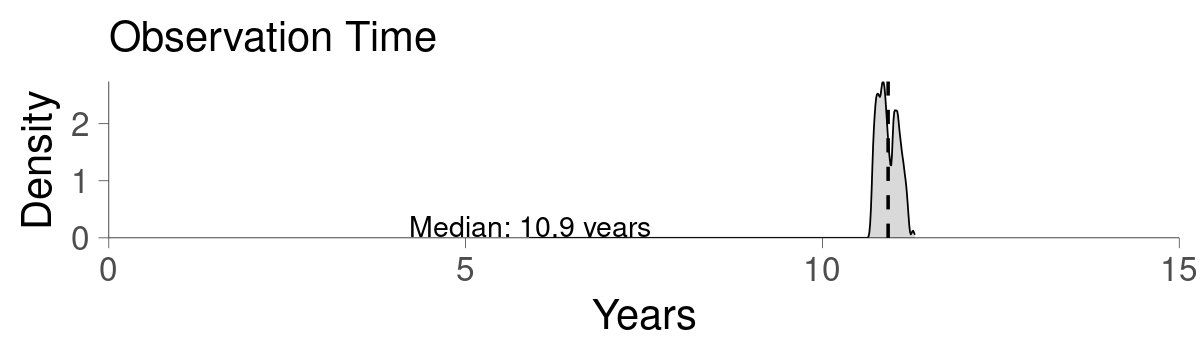

In [38]:
temp = data %>% filter(MACE_event==0)  %>% select(c(eid, MACE_event_time))
mean = round((temp %>% summarise(mean=median(MACE_event_time)))$mean, 1)
obs_time = ggplot(temp, aes(x=MACE_event_time)) + ggtitle("Observation Time") + 
    geom_density(fill="gray70", alpha=0.5) +
    labs(x="Years", y="Density") +
    geom_vline(aes(xintercept=mean(MACE_event_time)),color="black", linetype="dashed", size=1)+
    #geom_text(x=mean, label=mean, y=0.15, hjust=-0.5)+
    #ylab("Prevalence in [%]") +
    scale_x_continuous(expand=c(0,0))+
    scale_y_continuous(expand=c(0,0))+
    coord_cartesian(xlim=c(0, 15))+
    annotate("text", x=mean-5, y=0.2, label=paste0("Median: ", mean, " years"), size = geom_text_size)
obs_time

# ENDPOINTS

## Kaplan Meyer estimates

In [24]:
library(ggthemes)
endpoint_map = c(
    'M_MACE'='MACE',
    'M_all_cause_dementia'='Dementia',
    'M_type_2_diabetes'='T2 Diabetes',
    'M_liver_disease'='Liver Disease',
    'M_renal_disease'='Renal Disease',
    'M_atrial_fibrillation'='Atrial Fibrillation',
    'M_heart_failure'= 'Heart Failure',
    'M_coronary_heart_disease'='CHD',
    'M_venous_thrombosis'='Ven. Thrombosis',
    'M_cerebral_stroke'='Cerebral Stroke',
    'M_abdominal_aortic_aneurysm'='AAA',
    'M_peripheral_arterial_disease'='PAD',
    "M_chronic_obstructuve_pulmonary_disease" = "COPD",
    "M_asthma" = "Asthma",
    'M_parkinsons_disease' = "Parkinson's",    
    "M_lung_cancer" = "Lung Cancer",
    "M_non_melanoma_skin_cancer" = "Skin Cancer",
    "M_colon_cancer"= "Colon Cancer",
    "M_rectal_cancer" = "Rectal Cancer",
    "M_prostate_cancer"= "Prostate Cancer",
    "M_breast_cancer" = "Breast Cancer",
    'M_cataracts' = "Cataracts", 
    'M_glaucoma' = "Glaucoma",
    'M_fractures' = "Fractures"
)

endpoint_order = c("M_MACE", "M_coronary_heart_disease", "M_cerebral_stroke", "M_all_cause_dementia", "M_heart_failure", "M_atrial_fibrillation",
                   "M_type_2_diabetes", "M_liver_disease", "M_renal_disease", "M_peripheral_arterial_disease", "M_venous_thrombosis",  "M_abdominal_aortic_aneurysm",
                   "M_chronic_obstructuve_pulmonary_disease", "M_asthma", 'M_parkinsons_disease', 'M_cataracts', 'M_glaucoma', 'M_fractures',
                    "M_lung_cancer","M_non_melanoma_skin_cancer","M_colon_cancer","M_rectal_cancer","M_prostate_cancer","M_breast_cancer"
                   
)

In [25]:
temp_endpoints = data %>% select(starts_with("M_")) %>% select(ends_with("_event"), -contains("-time"), -contains("comp")) %>% 
    pivot_longer(everything()) %>% group_by(name) %>% summarise(frequency=mean(value)) %>% arrange(frequency) %>% ungroup() %>% as.data.frame() %>%
    mutate(name = str_remove_all(name, "_event")) %>% filter(name %in% endpoints) %>% mutate(name = factor(name, levels=endpoint_order))

In [26]:
inc_data = data %>% select("eid", all_of(paste0(names(endpoint_map), "_event"))) %>% pivot_longer(-eid, names_to="endpoint", values_to="Incident") %>% mutate(endpoint = str_remove_all(endpoint, "_event"))
prev_data = data %>% select(eid, all_of(names(endpoint_map))) %>% pivot_longer(-eid, names_to="endpoint", values_to="Prevalent") %>% mutate(Prevalent = as.integer(Prevalent))
agg_data = prev_data %>% left_join(inc_data, by=c("eid", "endpoint")) 
agg_data$endpoint = recode(agg_data$endpoint, !!!endpoint_map)
agg_data %>% head()

eid,endpoint,Prevalent,Incident
<int>,<chr>,<int>,<int>
1000084,MACE,0,0
1000084,Dementia,0,0
1000084,T2 Diabetes,0,0
1000084,Liver Disease,0,0
1000084,Renal Disease,0,0
1000084,Atrial Fibrillation,0,0


In [34]:
agg_data %>% filter(Prevalent==0) %>% group_by(endpoint) %>% summarise(frequency=sum(Incident)/n()) %>% arrange(frequency) %>% mutate(f = round(frequency*100, 2)) # %>% mutate(sum=n()) %>% group_by(frequency, sum) %>% tally() %>% mutate(freq=n*100/sum)

endpoint,frequency,f
<chr>,<dbl>,<dbl>
Parkinson's,0.006062973,0.61
Rectal Cancer,0.006516623,0.65
AAA,0.007740227,0.77
Colon Cancer,0.010372650,1.04
Lung Cancer,0.010763724,1.08
Ven. Thrombosis,0.017002070,1.70
Cerebral Stroke,0.018509996,1.85
Dementia,0.020640539,2.06
Breast Cancer,0.021451463,2.15


In [28]:
agg_data %>% filter(Prevalent==0) %>% group_by(eid) %>% summarise(frequency=sum(Incident)) %>% mutate(sum=n()) %>% group_by(frequency, sum) %>% tally() %>% mutate(freq=n*100/sum)

frequency,sum,n,freq
<int>,<int>,<int>,<dbl>
0,117981,62546,53.013620837
1,117981,27277,23.119824379
2,117981,13827,11.719683678
3,117981,7019,5.949263017
4,117981,3675,3.114908333
5,117981,1960,1.661284444
6,117981,938,0.795043270
7,117981,435,0.368703435
8,117981,192,0.162738068


In [37]:
117981-67735

[1] 50246

In [38]:
100-57.411786644

[1] 42.58821

# person years

In [43]:
tmp = data_outcomes %>% group_by(eid) %>% select(eid, time) %>% arrange(desc(time)) %>% slice(1) %>% ungroup()# %>% summarise(sum_years=sum(time))

In [48]:
tmp %>% filter(eid %in% eids_with_retina$retina_eids) %>% summarise(sum_years=sum(time))

sum_years
<dbl>
684967.8


In [49]:
tmp %>% filter(eid %in% eids_with_retina$retina_eids) %>% summarise(sum_years=median(time))

sum_years
<dbl>
11.38969


In [38]:
py_data = data %>% select("eid", all_of(paste0(names(endpoint_map), "_event_time"))) %>% pivot_longer(-eid, names_to="endpoint", values_to="person_years") %>% mutate(endpoint = str_remove_all(endpoint, "_event"))

ERROR: [1m[33mError[39m in [1m[1m`select()`:[22m
[33m![39m object 'endpoint_map' not found


In [40]:
py_data %>% group_by(eid) %>% arrange(desc(person_years)) %>% slice(1) %>% ungroup() %>% summarise(sum_years=sum(person_years))

sum_years
<dbl>
1435340


In [41]:
agg_data %>% filter(Prevalent==0) %>% group_by(endpoint) %>% summarise(frequency=mean(Incident)) %>% arrange(frequency) %>% ungroup()

endpoint,frequency
<chr>,<dbl>
Stomach Cancer,0.002263882
Ovarian Cancer,0.003046762
Oesoph. Cancer,0.003077967
Uterus Cancer,0.003361830
Parkinson's,0.006062973
Rectal Cancer,0.006516623
AAA,0.007740227
Colon Cancer,0.010372650
Lung Cancer,0.010763724


In [42]:
library(ggrepel)

In [43]:
temp_endpoints %>% mutate(label = recode(name, !!!endpoint_map))

name,frequency,label
<fct>,<dbl>,<fct>
M_stomach_cancer,0.002313932,Stomach Cancer
M_oesophagus_cancer,0.003263237,Oesoph. Cancer
M_ovarian_cancer,0.003280189,Ovarian Cancer
M_uterus_cancer,0.003483612,Uterus Cancer
M_rectal_cancer,0.006814657,Rectal Cancer
M_parkinsons_disease,0.007602919,Parkinson's
M_abdominal_aortic_aneurysm,0.008323374,AAA
M_colon_cancer,0.010883108,Colon Cancer
M_lung_cancer,0.011078055,Lung Cancer


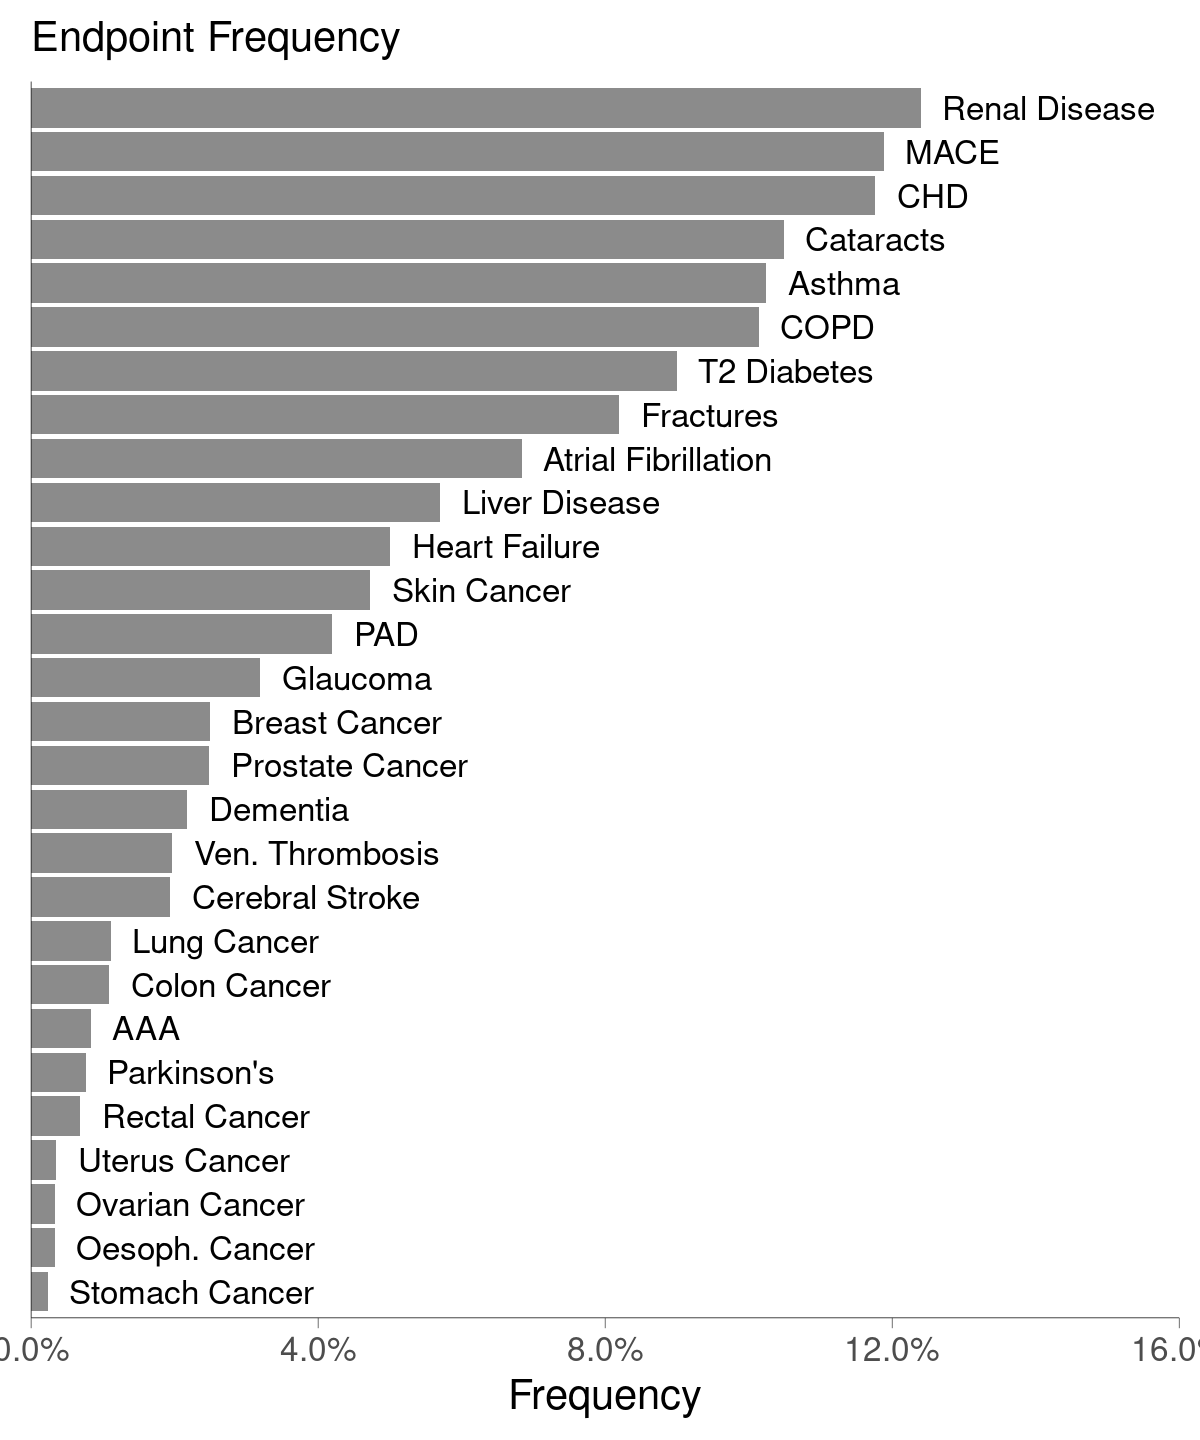

In [44]:
plot_width=10; plot_height=12; plot_dpi=320
options(repr.plot.width=plot_width, repr.plot.height=plot_height)
endpoint_freq = ggplot(temp_endpoints %>% mutate(label = recode(name, !!!endpoint_map))) + ggtitle("Endpoint Frequency") + 
    #geom_density(fill="gray70", alpha=0.5) +
    labs(x="Endpoint", y="Frequency") +
    geom_bar(stat="identity", aes(x=fct_rev(fct_reorder(name, desc(frequency))), y=frequency), size=1, alpha=0.7) + 
    coord_flip(ylim=c(0, 0.16))+
    theme(legend.position="none")+
    scale_x_discrete(labels = endpoint_map) + scale_y_continuous(expand=c(0, 0), labels=scales::percent) + 
    geom_text(aes(x=name, y=frequency+0.003, label=stringr::str_wrap(label, 20)), size=7, hjust=0)+
     theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank())
    #geom_text(x=mean, label=mean, y=0.15, hjust=-0.5)+
    #ylab("Prevalence in [%]") +
   # scale_x_continuous(expand=c(0,0))+
    #scale_y_continuous(expand=c(0,0))+

    #coord_cartesian(xlim=c(0, 15))+
endpoint_freq

In [31]:
library(patchwork)
theme_set(theme_classic(base_size = base_size) + 
    theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0),
          #axis.title.y = element_blank(), 
          axis.text.y = element_text(size=base_size), #axis.ticks.y = element_blank(), axis.line.y = element_blank(),
          #axis.title.x = element_blank(), 
          axis.text.x = element_text(size=base_size), #axis.ticks.x = element_blank(), axis.line.x = element_blank(), 
          strip.text.x = element_text(size = facet_size)) + theme(legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2)))


Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots




In [34]:
flowchart <- png::readPNG("UKB_Flowchart1.png", native = TRUE)

In [88]:
options(repr.plot.width=plot_width, repr.plot.height=plot_height)
right = #(#(obs_time + theme(plot.title=element_text(size=25, hjust=0.5))) / 
        (endpoint_freq + theme(plot.title=element_text(size=25, hjust=0.5)))#) + 
        #plot_layout(heights = c(2, 10))

In [89]:
library(patchwork)


Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots




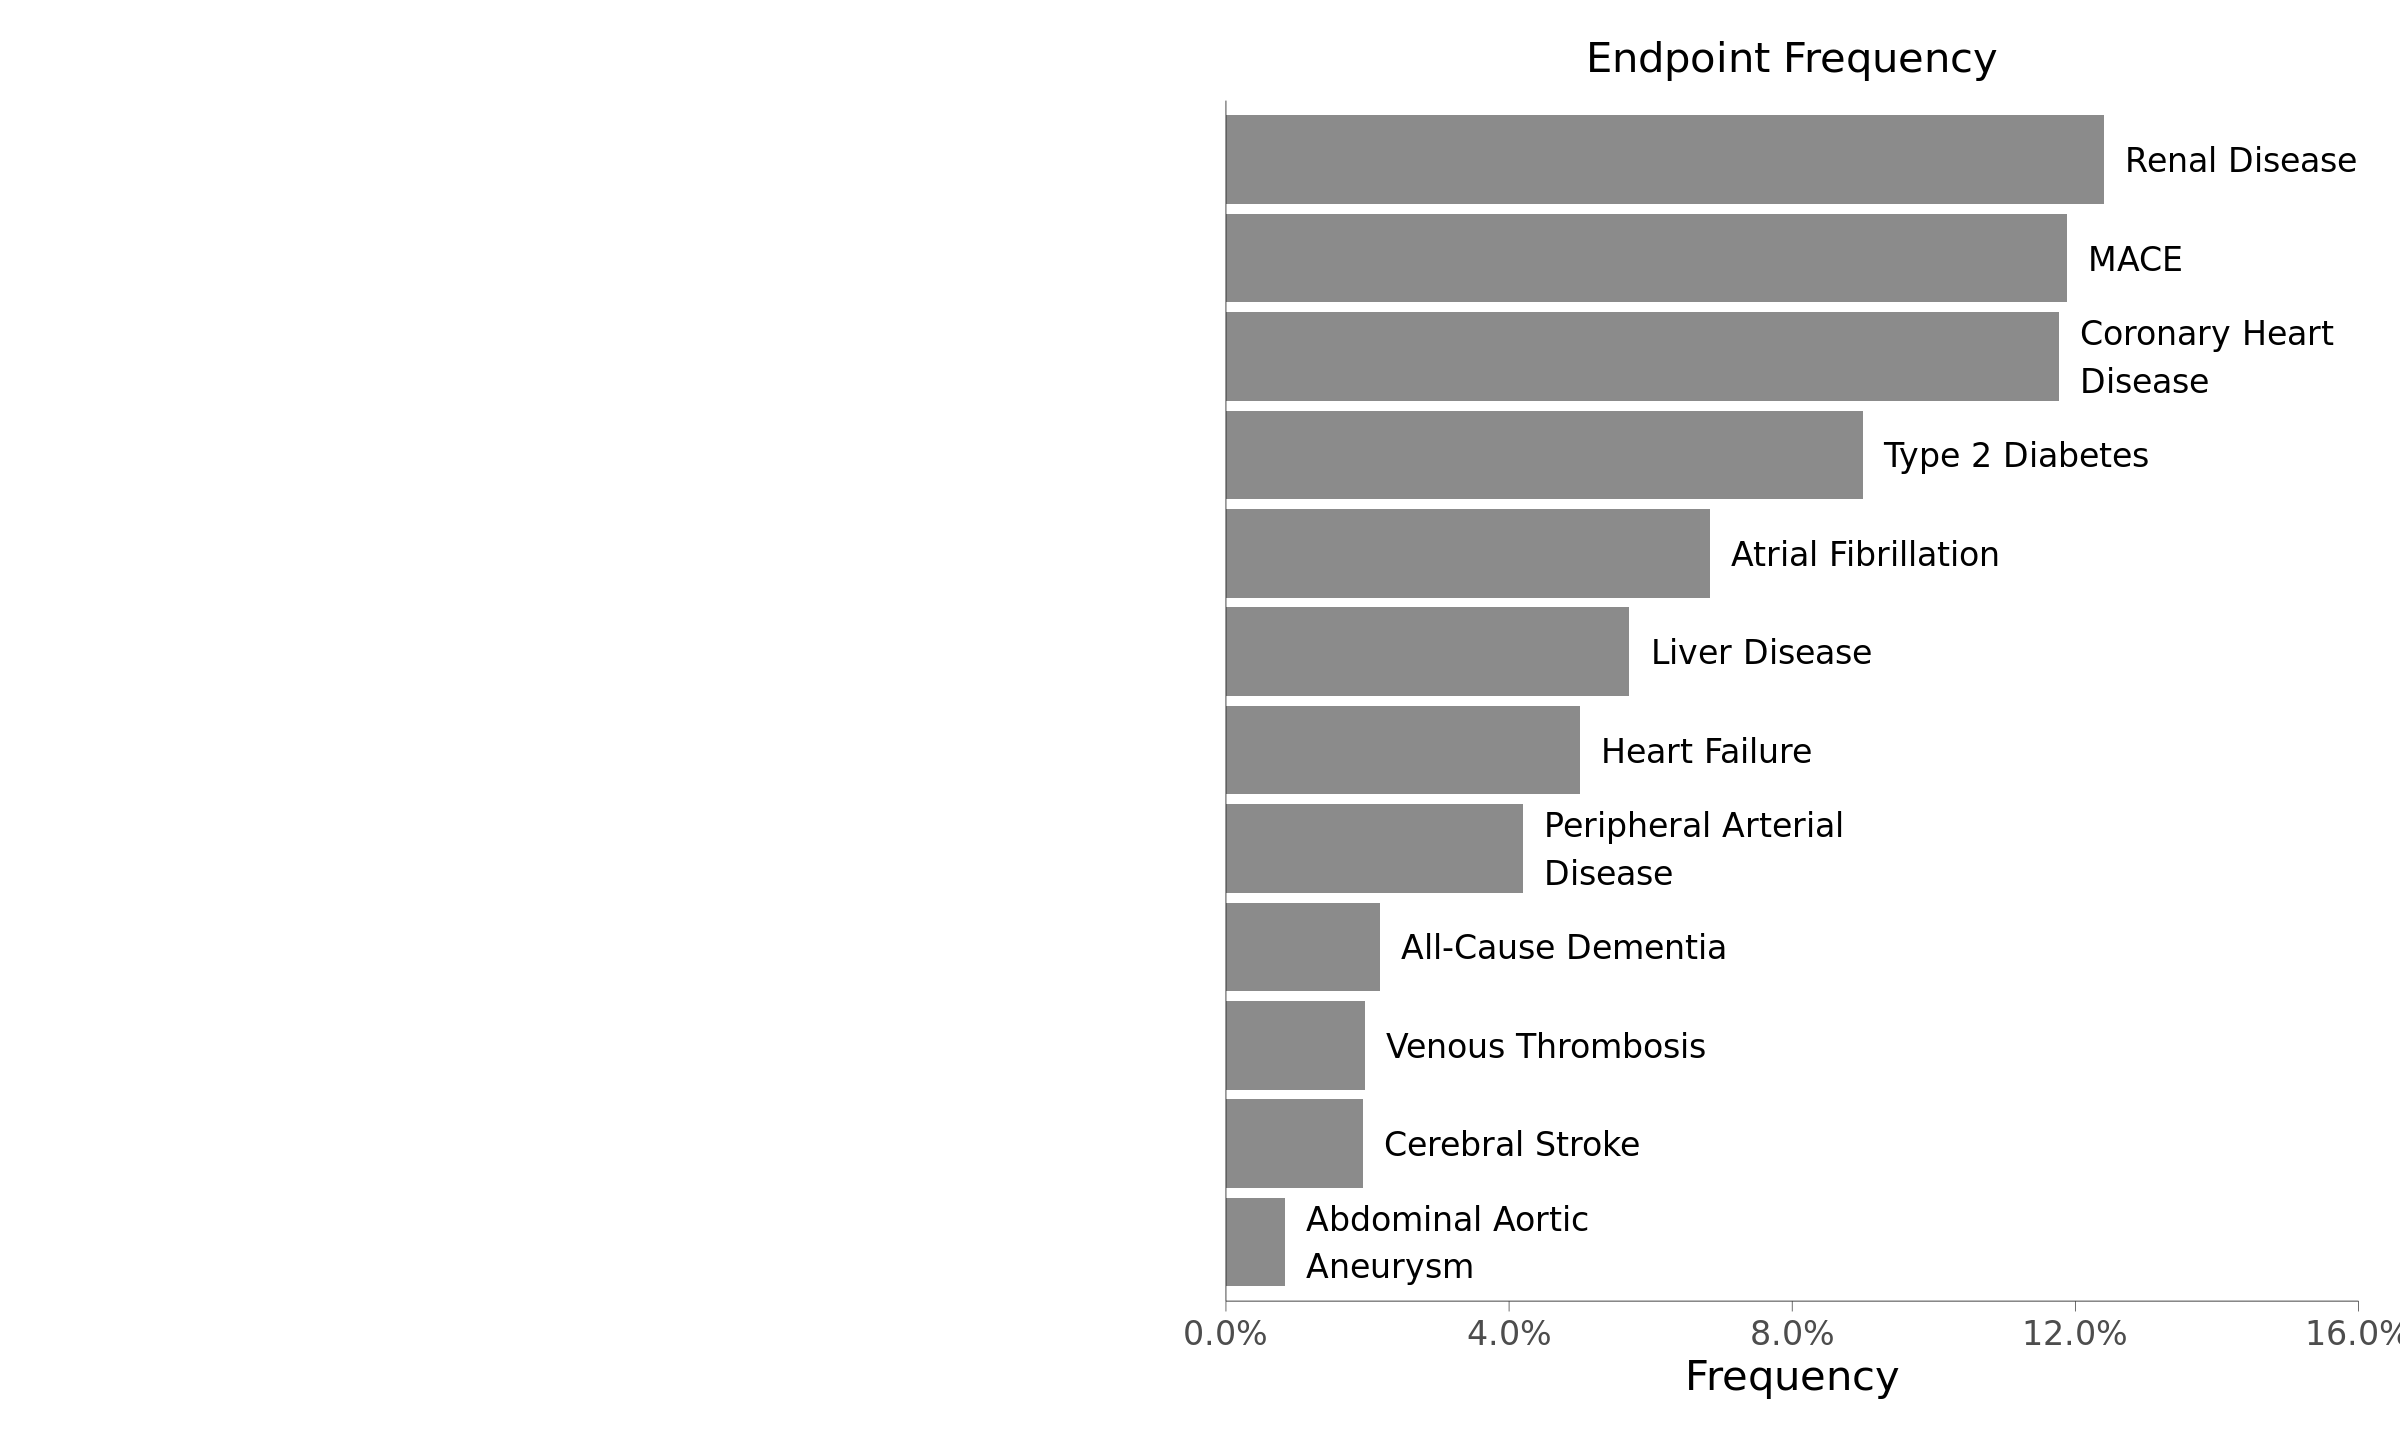

In [90]:
plot_width=20; plot_height=12; plot_dpi=320
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

fig1 = (plot_spacer() | right)#+
    #plot_annotation(title = "Figure 1: Participant Selection and Subcohort Characteristics") + 
    #plot_annotation(subtitle = "~11.1 years average observation window; 21664 (~5.4%) major adverse cardiac events (MACE) in first 10 years")
    #plot_annotation(tag_levels = "A")
fig1

In [102]:
plot_name = "Figure1"
ggsave(filename=glue("{figure_path}/{plot_name}.pdf"), plot=fig1, width=plot_width, height=plot_height, dpi=plot_dpi, device="pdf")